In [1]:
from waterlevels_oker import utils
from waterlevels_oker.data import preprocess_weather_data
import pandas as pd
import numpy as np
import seaborn as sns

%config InlineBackend.figure_format = "retina"

# Import & Cleaning

In [2]:
measurements_2019 = pd.read_excel(
	utils.get_raw_path("Übersicht Pegelwerte 2019-2023.xlsx"),
	sheet_name="2019",
	header=[0, 1],
)

In [3]:
measurements_2019

2019              Datum Okertalsperre             Schladen  \
    Unnamed: 0_level_1 Unnamed: 1_level_1      Füll (%) Abg. (m³/s)        m   
0                  Di.         2019-01-01          37.0        1.40     0.72   
1                   Mi         2019-01-02          38.0        1.40     0.73   
2                   Do         2019-01-03          38.0        1.40     0.72   
3                   Fr         2019-01-04          39.0        1.40     0.72   
4                   Sa         2019-01-05          39.0        1.36     0.80   
..                 ...                ...           ...         ...      ...   
360                 Fr         2019-12-27          33.0        1.30     0.68   
361                 Sa         2019-12-28          34.0        1.30     0.68   
362                 So         2019-12-29          34.0        1.30     0.69   
363                 Mo         2019-12-30          35.0        1.30     0.68   
364                 Di         2019-12-31          35.0        1.30     0.68   

           Ohrum               sensoweb  ... Eisenbütteler Wehr Petriwehr  \
     88.72     m  75.54 m³/s Schäferbr.  ...                 OW        OW   
0    89.44  1.29  76.83  4.5      72.45  ...              70.75     69.21   
1    89.45  1.36  76.90  5.0      72.51  ...              70.75     69.27   
2    89.44  1.22  76.76  4.0      72.46  ...              70.73     69.30   
3    89.44  1.19  76.73  3.7      72.43  ...              70.75     69.20   
4    89.52  1.31  76.85  4.5      72.43  ...              70.75     69.34   
..     ...   ...    ...  ...        ...  ...                ...       ...   
360  89.40  1.21  76.75  3.9      72.41  ...              70.73     69.42   
361  89.40  1.18  76.72  3.6      72.39  ...              70.72     69.40   
362  89.41  1.17  76.71  3.6      72.39  ...              70.68     69.39   
363  89.40  1.15  76.69  3.5      72.39  ...              70.69     69.38   
364  89.40  1.16  76.70  3.5        NaN  ...              70.72     69.37   

    Wendenwehr Tel.: 2511 Ölper Wehr           Groß Schwülper         \
            OW        HKW         OW Veltenhof              m  55.99   
0        69.24      66.68      66.60     64.04           2.39  58.38   
1        69.27      66.71      66.60     64.02           2.38  58.37   
2        69.33      66.68      66.59     64.03           2.39  58.38   
3        69.22      66.68      66.57     63.97           2.36  58.35   
4        69.38      66.69      66.59     63.97           2.33  58.32   
..         ...        ...        ...       ...            ...    ...   
360      69.45      66.59      66.55     63.94           2.43  58.42   
361      69.42      66.59      66.55     63.85           2.35  58.34   
362      69.40      66.59      66.54     63.85           2.30  58.29   
363      69.39      66.59      66.54     63.81           2.27  58.26   
364      69.39      66.60      66.56     63.79           2.26  58.25   

         Wetter        
    Niederschl. Temp.  
0           2.6   7.0  
1           0.0   2.0  
2           0.0  -5.0  
3           0.9   2.0  
4           5.0   5.0  
..          ...   ...  
360         0.3   1.0  
361         0.0  -3.0  
362         0.0  -4.0  
363         0.0   1.0  
364         0.2   2.0  

[365 rows x 22 columns]

In [4]:
cols_to_drop = {
	year: [
		(year, "Unnamed: 0_level_1"),
		("Schladen", "m"),
		# ("Schladen", 88.72),
		("Ohrum", "m"),
		# ("Ohrum", 75.54),
		# ("Ohrum", "m³/s"),
		("sensoweb", "Schäferbr."),
		("sensoweb", "Rüningen"),
		("sensoweb", "DLRG"),
		("Groß Schwülper", "m"),
		("Groß Schwülper", 55.99),
		("Wetter", "Niederschl."),
		("Wetter", "Temp."),
	]
	for year in [2019, 2020, 2021, 2022, 2023]
}

In [5]:
measurements_2019 = measurements_2019.drop(columns=cols_to_drop[2019])
measurements_2019

Datum Okertalsperre             Schladen  Ohrum       \
    Unnamed: 1_level_1      Füll (%) Abg. (m³/s)    88.72  75.54 m³/s   
0           2019-01-01          37.0        1.40    89.44  76.83  4.5   
1           2019-01-02          38.0        1.40    89.45  76.90  5.0   
2           2019-01-03          38.0        1.40    89.44  76.76  4.0   
3           2019-01-04          39.0        1.40    89.44  76.73  3.7   
4           2019-01-05          39.0        1.36    89.52  76.85  4.5   
..                 ...           ...         ...      ...    ...  ...   
360         2019-12-27          33.0        1.30    89.40  76.75  3.9   
361         2019-12-28          34.0        1.30    89.40  76.72  3.6   
362         2019-12-29          34.0        1.30    89.41  76.71  3.6   
363         2019-12-30          35.0        1.30    89.40  76.69  3.5   
364         2019-12-31          35.0        1.30    89.40  76.70  3.5   

    Eisenbütteler Wehr Petriwehr Wendenwehr Tel.: 2511 Ölper Wehr            
                    OW        OW         OW        HKW         OW Veltenhof  
0                70.75     69.21      69.24      66.68      66.60     64.04  
1                70.75     69.27      69.27      66.71      66.60     64.02  
2                70.73     69.30      69.33      66.68      66.59     64.03  
3                70.75     69.20      69.22      66.68      66.57     63.97  
4                70.75     69.34      69.38      66.69      66.59     63.97  
..                 ...       ...        ...        ...        ...       ...  
360              70.73     69.42      69.45      66.59      66.55     63.94  
361              70.72     69.40      69.42      66.59      66.55     63.85  
362              70.68     69.39      69.40      66.59      66.54     63.85  
363              70.69     69.38      69.39      66.59      66.54     63.81  
364              70.72     69.37      69.39      66.60      66.56     63.79  

[365 rows x 12 columns]

In [6]:
measurements_2019.columns = measurements_2019.columns.to_flat_index()
measurements_2019 = measurements_2019.rename(
	columns={measurements_2019.columns[0]: "date"}
)
measurements_2019

,date,"(Okertalsperre, Füll (%))","(Okertalsperre, Abg. (m³/s))","(Schladen, 88.72)","(Ohrum, 75.54)","(Ohrum, m³/s)","(Eisenbütteler Wehr, OW)","(Petriwehr, OW)","(Wendenwehr, OW)","(Tel.: 2511, HKW)","(Ölper Wehr, OW)","(Ölper Wehr, Veltenhof)"
0,2019-01-01,37.0,1.40,89.44,76.83,4.5,70.75,69.21,69.24,66.68,66.60,64.04
1,2019-01-02,38.0,1.40,89.45,76.90,5.0,70.75,69.27,69.27,66.71,66.60,64.02
2,2019-01-03,38.0,1.40,89.44,76.76,4.0,70.73,69.30,69.33,66.68,66.59,64.03
3,2019-01-04,39.0,1.40,89.44,76.73,3.7,70.75,69.20,69.22,66.68,66.57,63.97
4,2019-01-05,39.0,1.36,89.52,76.85,4.5,70.75,69.34,69.38,66.69,66.59,63.97
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,33.0,1.30,89.40,76.75,3.9,70.73,69.42,69.45,66.59,66.55,63.94
361,2019-12-28,34.0,1.30,89.40,76.72,3.6,70.72,69.40,69.42,66.59,66.55,63.85
362,2019-12-29,34.0,1.30,89.41,76.71,3.6,70.68,69.39,69.40,66.59,66.54,63.85
363,2019-12-30,35.0,1.30,89.40,76.69,3.5,70.69,69.38,69.39,66.59,66.54,63.81


In [7]:
measurements_2020 = pd.read_excel(
	utils.get_raw_path("Übersicht Pegelwerte 2019-2023.xlsx"),
	sheet_name="2020",
	header=[0, 1],
)

In [8]:
measurements_2020 = measurements_2020.drop(columns=cols_to_drop[2020]).drop(
	columns=[("Eisenbütteler Wehr", "UW")]
)
measurements_2020

2020 Okertalsperre             Schladen  Ohrum       \
    Unnamed: 1_level_1      Füll (%) Abg. (m³/s)    88.72  75.54 m³/s   
0           2020-01-01            35         1.3    89.40  76.68  3.5   
1           2020-01-02            35         1.3    89.40  76.67  3.4   
2           2020-01-03            35         1.3    89.40  76.68  3.5   
3           2020-01-04            35         1.3    89.41  76.72  3.7   
4           2020-01-05            35         1.3    89.44  76.83  4.4   
..                 ...           ...         ...      ...    ...  ...   
361         2020-12-27            30         1.3    89.40  76.54  2.6   
362         2020-12-28            30         1.3    89.39  76.55  2.6   
363         2020-12-29            30         1.3    89.39  76.64  3.2   
364         2020-12-30            30         1.3    89.39  76.60  2.9   
365         2020-12-31            30         1.3    89.38  76.60  2.9   

    Eisenbütteler Wehr Petriwehr Wendenwehr Tel.: 2511 Ölper Wehr            
                    OW        OW         OW        HKW         OW Veltenhof  
0                70.71     69.36      69.37      66.58      66.56     63.77  
1                70.70     69.36      69.37      66.58      66.55     63.77  
2                70.71     69.34      69.35      66.58      66.55     63.78  
3                70.71     69.35      69.36      66.58      66.56     63.78  
4                70.75     69.44      69.46      66.59      66.56     63.93  
..                 ...       ...        ...        ...        ...       ...  
361              70.75         -      68.83      66.52      66.48     63.74  
362              70.75         -      68.79      66.52      66.50     63.70  
363              70.77         -      68.77      66.53      66.49     63.64  
364              70.75         -      68.80      66.52      66.51     63.60  
365              70.76         -      68.78      66.52      66.49     63.65  

[366 rows x 12 columns]

In [9]:
measurements_2020.columns = measurements_2020.columns.to_flat_index()
measurements_2020 = measurements_2020.rename(
	columns={measurements_2020.columns[0]: "date"}
)
measurements_2020

,date,"(Okertalsperre, Füll (%))","(Okertalsperre, Abg. (m³/s))","(Schladen, 88.72)","(Ohrum, 75.54)","(Ohrum, m³/s)","(Eisenbütteler Wehr, OW)","(Petriwehr, OW)","(Wendenwehr, OW)","(Tel.: 2511, HKW)","(Ölper Wehr, OW)","(Ölper Wehr, Veltenhof)"
0,2020-01-01,35,1.3,89.40,76.68,3.5,70.71,69.36,69.37,66.58,66.56,63.77
1,2020-01-02,35,1.3,89.40,76.67,3.4,70.70,69.36,69.37,66.58,66.55,63.77
2,2020-01-03,35,1.3,89.40,76.68,3.5,70.71,69.34,69.35,66.58,66.55,63.78
3,2020-01-04,35,1.3,89.41,76.72,3.7,70.71,69.35,69.36,66.58,66.56,63.78
4,2020-01-05,35,1.3,89.44,76.83,4.4,70.75,69.44,69.46,66.59,66.56,63.93
...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-12-27,30,1.3,89.40,76.54,2.6,70.75,-,68.83,66.52,66.48,63.74
362,2020-12-28,30,1.3,89.39,76.55,2.6,70.75,-,68.79,66.52,66.50,63.70
363,2020-12-29,30,1.3,89.39,76.64,3.2,70.77,-,68.77,66.53,66.49,63.64
364,2020-12-30,30,1.3,89.39,76.60,2.9,70.75,-,68.80,66.52,66.51,63.60


In [10]:
measurements_2021 = pd.read_excel(
	utils.get_raw_path("Übersicht Pegelwerte 2019-2023.xlsx"),
	sheet_name="2021",
	header=[1, 2],
)
measurements_2021

2021                    Okertalsperre             Schladen  \
    Unnamed: 0_level_1 Unnamed: 1_level_1      Füll (%) Abg. (m³/s)        m   
0                   Fr         2021-01-01            30         1.3     0.66   
1                   Sa         2021-01-02            29         1.3     0.66   
2                   So         2021-01-03            30         1.3     0.67   
3                   Mo         2021-01-04            29         1.3     0.68   
4                   Di         2021-01-05            29         1.3     0.67   
..                 ...                ...           ...         ...      ...   
360                 Mo         2021-12-27            36         1.3     0.71   
361                 Di         2021-12-28            36         1.3     0.72   
362                 Mi         2021-12-29            36         1.3     0.72   
363                 Do         2021-12-30            36         1.3     0.72   
364                 Fr         2021-12-31            37         1.3     0.73   

           Ohrum               sensoweb  ... Eisenbütteler Wehr Petriwehr  \
     88.72     m  75.54 m³/s Schäferbr.  ...                 UW        OW   
0    89.38  1.03  76.57  2.8      72.38  ...              68.88       NaN   
1    89.38  1.01  76.55  2.6      72.38  ...              68.85       NaN   
2    89.39  1.05  76.59  3.0      72.38  ...              68.86       NaN   
3    89.40  1.09  76.63  3.1      72.38  ...              68.94       NaN   
4    89.39  1.07  76.61  3.0      72.38  ...              68.99       NaN   
..     ...   ...    ...  ...        ...  ...                ...       ...   
360  89.43  1.17  76.71  3.6      72.41  ...              69.01     68.93   
361  89.44  1.19  76.73  3.7      72.44  ...              69.26     69.22   
362  89.44  1.20  76.74  3.8      72.46  ...              69.27     69.23   
363  89.44  1.21  76.75  3.8      72.45  ...              69.18     69.14   
364  89.45  1.23  76.77  3.9      72.46  ...              69.21     69.17   

    Wendenwehr Tel.: 2511 Ölper Wehr           Groß Schwülper         \
            OW        HKW         OW Veltenhof              m  55.99   
0        68.77      66.52      69.49     63.65           2.19  58.18   
1        68.76      66.53      66.49     63.64           2.19  58.18   
2        68.75      66.53      66.49     63.64           2.18  58.17   
3        68.84      66.52      66.51     63.70           2.22  58.21   
4        68.92      66.52      66.50     63.72           2.25  58.24   
..         ...        ...        ...       ...            ...    ...   
360      68.97      66.58      66.55     63.90           2.42  58.41   
361      69.25      66.61      66.57     63.76           2.32  58.31   
362      69.26      66.62      66.54     63.88           2.41  58.40   
363      69.16      66.61      66.53     63.94           2.49  58.48   
364      69.18      66.62      66.56     63.93           2.55  58.54   

         Wetter        
    Niederschl. Temp.  
0           0.0   0.0  
1           0.0   1.0  
2           6.4   1.0  
3           2.1   1.0  
4           2.0   1.0  
..          ...   ...  
360         0.2  -3.0  
361         3.7   5.0  
362         2.8   4.0  
363         2.7   9.0  
364         0.5  13.0  

[365 rows x 23 columns]

In [11]:
measurements_2021 = measurements_2021.drop(columns=cols_to_drop[2021]).drop(
	columns=[("Eisenbütteler Wehr", "UW")]
)
measurements_2021

2021 Okertalsperre             Schladen  Ohrum       \
    Unnamed: 1_level_1      Füll (%) Abg. (m³/s)    88.72  75.54 m³/s   
0           2021-01-01            30         1.3    89.38  76.57  2.8   
1           2021-01-02            29         1.3    89.38  76.55  2.6   
2           2021-01-03            30         1.3    89.39  76.59  3.0   
3           2021-01-04            29         1.3    89.40  76.63  3.1   
4           2021-01-05            29         1.3    89.39  76.61  3.0   
..                 ...           ...         ...      ...    ...  ...   
360         2021-12-27            36         1.3    89.43  76.71  3.6   
361         2021-12-28            36         1.3    89.44  76.73  3.7   
362         2021-12-29            36         1.3    89.44  76.74  3.8   
363         2021-12-30            36         1.3    89.44  76.75  3.8   
364         2021-12-31            37         1.3    89.45  76.77  3.9   

    Eisenbütteler Wehr Petriwehr Wendenwehr Tel.: 2511 Ölper Wehr            
                    OW        OW         OW        HKW         OW Veltenhof  
0                70.75       NaN      68.77      66.52      69.49     63.65  
1                70.74       NaN      68.76      66.53      66.49     63.64  
2                70.76       NaN      68.75      66.53      66.49     63.64  
3                70.76       NaN      68.84      66.52      66.51     63.70  
4                70.75       NaN      68.92      66.52      66.50     63.72  
..                 ...       ...        ...        ...        ...       ...  
360              70.72     68.93      68.97      66.58      66.55     63.90  
361              70.71     69.22      69.25      66.61      66.57     63.76  
362              70.75     69.23      69.26      66.62      66.54     63.88  
363              70.80     69.14      69.16      66.61      66.53     63.94  
364              70.81     69.17      69.18      66.62      66.56     63.93  

[365 rows x 12 columns]

In [12]:
measurements_2021.columns = measurements_2021.columns.to_flat_index()
measurements_2021 = measurements_2021.rename(
	columns={measurements_2021.columns[0]: "date"}
)
measurements_2021

,date,"(Okertalsperre, Füll (%))","(Okertalsperre, Abg. (m³/s))","(Schladen, 88.72)","(Ohrum, 75.54)","(Ohrum, m³/s)","(Eisenbütteler Wehr, OW)","(Petriwehr, OW)","(Wendenwehr, OW)","(Tel.: 2511, HKW)","(Ölper Wehr, OW)","(Ölper Wehr, Veltenhof)"
0,2021-01-01,30,1.3,89.38,76.57,2.8,70.75,NaN,68.77,66.52,69.49,63.65
1,2021-01-02,29,1.3,89.38,76.55,2.6,70.74,NaN,68.76,66.53,66.49,63.64
2,2021-01-03,30,1.3,89.39,76.59,3.0,70.76,NaN,68.75,66.53,66.49,63.64
3,2021-01-04,29,1.3,89.40,76.63,3.1,70.76,NaN,68.84,66.52,66.51,63.70
4,2021-01-05,29,1.3,89.39,76.61,3.0,70.75,NaN,68.92,66.52,66.50,63.72
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,36,1.3,89.43,76.71,3.6,70.72,68.93,68.97,66.58,66.55,63.90
361,2021-12-28,36,1.3,89.44,76.73,3.7,70.71,69.22,69.25,66.61,66.57,63.76
362,2021-12-29,36,1.3,89.44,76.74,3.8,70.75,69.23,69.26,66.62,66.54,63.88
363,2021-12-30,36,1.3,89.44,76.75,3.8,70.80,69.14,69.16,66.61,66.53,63.94


In [13]:
measurements_2022 = pd.read_excel(
	utils.get_raw_path("Übersicht Pegelwerte 2019-2023.xlsx"),
	sheet_name="2022",
	header=[0, 1],
)
measurements_2022

2022                      Okertalsperre             Schladen         \
    Uhrzeit Uhrzeit.1  Uhrzeit.2      Füll (%) Abg. (m³/s)        m  88.72   
0       NaN        Sa 2022-01-01            38         1.3     0.72  89.44   
1       NaN        So 2022-01-02            38         1.3     0.72  89.44   
2      Kw.1        Mo 2022-01-03            39         1.3     0.74  89.46   
3       NaN        Di 2022-01-04            40         1.3     0.74  89.46   
4       NaN        Mi 2022-01-05            40         1.3     0.75  89.47   
..      ...       ...        ...           ...         ...      ...    ...   
360    KW52        Di 2022-12-27            25         1.1     0.73  89.45   
361     NaN        Mi 2022-12-28            26         1.3     0.72  89.44   
362     NaN        Do 2022-12-29            27         1.3     0.70  89.42   
363     NaN        Fr 2022-12-30            27         1.3     0.70  89.42   
364     NaN        Sa 2022-12-31            28         1.3     0.70  89.42   

    Ohrum               ... Petriwehr Wendenwehr       Tel.: 2511 Ölper Wehr  \
        m  75.54  m³/s  ...        UW         OW    UW        HKW         OW   
0    1.25  76.79  4.20  ...       NaN      69.24  66.6      66.61      66.57   
1    1.19  76.73  3.70  ...       NaN      69.15  66.6      66.62      66.56   
2    1.25  76.79  4.20  ...       NaN      69.16  66.6      66.60      66.55   
3    1.25  76.79  4.20  ...       NaN      69.25  66.6      66.59      66.55   
4    1.27  76.81  4.32  ...       NaN      69.28  66.6      66.62      66.56   
..    ...    ...   ...  ...       ...        ...   ...        ...        ...   
360  1.35  76.89  4.90  ...     66.50      69.35  66.6      66.46      66.46   
361  1.13  76.67  3.30  ...     66.51      69.33  66.6      66.49      66.50   
362  1.12  76.66  3.30  ...     66.49      69.35  66.6      66.47      66.49   
363  1.16  76.70  3.60  ...     66.51      69.34  66.6      66.48      66.50   
364  1.11  76.65  3.20  ...     66.57      69.37  66.6      66.53      66.51   

              Groß Schwülper             Wetter        
    Veltenhof              m  55.99 Niederschl. Temp.  
0       63.93           2.55  58.54         0.0  13.0  
1       63.93           2.51  58.50         0.1  11.0  
2       63.89           2.45  58.44         0.9  10.0  
3       63.87           2.42  58.41         0.3   7.0  
4       63.98           2.44  58.43         6.3   3.0  
..        ...            ...    ...         ...   ...  
360     64.04           2.67  58.66         1.0   1.0  
361     63.93           2.56  58.55         0.1   3.0  
362     63.78           2.38  58.37         0.2   8.0  
363     63.80           2.37  58.36         0.0   5.0  
364     63.86           2.39  58.38         5.5  10.0  

[365 rows x 28 columns]

In [14]:
cols_to_drop_2022 = [
	(2022, "Uhrzeit"),
	(2022, "Uhrzeit.1"),
	("Schladen", "m"),
	# ("Schladen", 88.72),
	("Ohrum", "m"),
	# ("Ohrum", 75.54),
	# ("Ohrum", "m³/s"),
	("sensoweb", "Schäferbr."),
	("sensoweb", "Rüningen"),
	("sensoweb", "DLRG"),
	("Groß Schwülper", "m"),
	("Groß Schwülper", 55.99),
	("Wetter", "Niederschl."),
	("Wetter", "Temp."),
	("Eisenbütteler Wehr", "UW"),
	("Eisenbütteler Wehr", "m³/s"),
	("Eisenbütteler Wehr", "Kalenwall"),
	("Petriwehr", "UW"),
	("Wendenwehr", "UW"),
]

In [15]:
measurements_2022 = measurements_2022.drop(columns=cols_to_drop_2022)
measurements_2022

2022 Okertalsperre             Schladen  Ohrum        \
     Uhrzeit.2      Füll (%) Abg. (m³/s)    88.72  75.54  m³/s   
0   2022-01-01            38         1.3    89.44  76.79  4.20   
1   2022-01-02            38         1.3    89.44  76.73  3.70   
2   2022-01-03            39         1.3    89.46  76.79  4.20   
3   2022-01-04            40         1.3    89.46  76.79  4.20   
4   2022-01-05            40         1.3    89.47  76.81  4.32   
..         ...           ...         ...      ...    ...   ...   
360 2022-12-27            25         1.1    89.45  76.89  4.90   
361 2022-12-28            26         1.3    89.44  76.67  3.30   
362 2022-12-29            27         1.3    89.42  76.66  3.30   
363 2022-12-30            27         1.3    89.42  76.70  3.60   
364 2022-12-31            28         1.3    89.42  76.65  3.20   

    Eisenbütteler Wehr Petriwehr Wendenwehr Tel.: 2511 Ölper Wehr            
                    OW        OW         OW        HKW         OW Veltenhof  
0                70.80     69.22      69.24      66.61      66.57     63.93  
1                70.79     69.14      69.15      66.62      66.56     63.93  
2                70.74     69.15      69.16      66.60      66.55     63.89  
3                70.80     69.23      69.25      66.59      66.55     63.87  
4                70.73     69.24      69.28      66.62      66.56     63.98  
..                 ...       ...        ...        ...        ...       ...  
360              70.84     69.30      69.35      66.46      66.46     64.04  
361              70.79     69.30      69.33      66.49      66.50     63.93  
362              70.81     69.30      69.35      66.47      66.49     63.78  
363              70.81     69.30      69.34      66.48      66.50     63.80  
364              70.80     69.30      69.37      66.53      66.51     63.86  

[365 rows x 12 columns]

In [16]:
measurements_2022.columns = measurements_2022.columns.to_flat_index()
measurements_2022 = measurements_2022.rename(
	columns={measurements_2022.columns[0]: "date"}
)
measurements_2022

,date,"(Okertalsperre, Füll (%))","(Okertalsperre, Abg. (m³/s))","(Schladen, 88.72)","(Ohrum, 75.54)","(Ohrum, m³/s)","(Eisenbütteler Wehr, OW)","(Petriwehr, OW)","(Wendenwehr, OW)","(Tel.: 2511, HKW)","(Ölper Wehr, OW)","(Ölper Wehr, Veltenhof)"
0,2022-01-01,38,1.3,89.44,76.79,4.20,70.80,69.22,69.24,66.61,66.57,63.93
1,2022-01-02,38,1.3,89.44,76.73,3.70,70.79,69.14,69.15,66.62,66.56,63.93
2,2022-01-03,39,1.3,89.46,76.79,4.20,70.74,69.15,69.16,66.60,66.55,63.89
3,2022-01-04,40,1.3,89.46,76.79,4.20,70.80,69.23,69.25,66.59,66.55,63.87
4,2022-01-05,40,1.3,89.47,76.81,4.32,70.73,69.24,69.28,66.62,66.56,63.98
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2022-12-27,25,1.1,89.45,76.89,4.90,70.84,69.30,69.35,66.46,66.46,64.04
361,2022-12-28,26,1.3,89.44,76.67,3.30,70.79,69.30,69.33,66.49,66.50,63.93
362,2022-12-29,27,1.3,89.42,76.66,3.30,70.81,69.30,69.35,66.47,66.49,63.78
363,2022-12-30,27,1.3,89.42,76.70,3.60,70.81,69.30,69.34,66.48,66.50,63.80


In [17]:
measurements_2023 = pd.read_excel(
	utils.get_raw_path("Übersicht Pegelwerte 2019-2023.xlsx"),
	sheet_name="2023",
	header=[0, 1],
)
measurements_2023

2023                      Okertalsperre             Schladen         \
    Uhrzeit Uhrzeit.1  Uhrzeit.2      Füll (%) Abg. (m³/s)        m  88.72   
0       NaN        So 2023-01-01            28         1.3     0.68  89.40   
1      Kw.1        Mo 2023-01-02            28         1.3     0.68  89.40   
2       NaN        Di 2023-01-03            29         1.3     0.70  89.42   
3       NaN        Mi 2023-01-04            29         1.3     0.68  89.40   
4       NaN        Do 2023-01-05            30         1.3     0.73  89.45   
..      ...       ...        ...           ...         ...      ...    ...   
360     NaN        Mi 2023-12-27           101        20.6     2.85  91.57   
361     NaN        Do 2023-12-28          99.7        21.8     2.57  91.29   
362     NaN        Fr 2023-12-29          97.4          22     2.52  91.24   
363     NaN        Sa 2023-12-30          95.4        20.5     2.59  91.31   
364     NaN        So 2023-12-31          93.9        20.4     2.41  91.13   

    Ohrum              ... Eisenbütteler Wehr Petriwehr Wendenwehr Tel.: 2511  \
        m  75.54 m³/s  ...          Kalenwall        OW         OW        HKW   
0    1.10  76.64  3.2  ...                  -     69.30      69.34      66.48   
1    0.87  76.41  2.0  ...                  -     69.30      69.34      66.49   
2    1.03  76.57  2.7  ...                  -     69.30      69.33      66.48   
3    0.98  76.52  2.5  ...                  -     69.30      69.34      66.50   
4    1.16  76.70  3.5  ...                  -     69.30      69.37      66.51   
..    ...    ...  ...  ...                ...       ...        ...        ...   
360  4.33  79.87  NaN  ...              70.17     69.04      68.75      68.11   
361  4.29  79.83  NaN  ...              70.14     68.99      68.67      68.10   
362  4.21  79.75  NaN  ...              69.97     68.72      68.42      68.11   
363  4.17  79.71  NaN  ...              69.78     68.65      68.27      68.00   
364  4.19  79.73  NaN  ...              69.69     68.58      68.18      67.98   

    Ölper Wehr           Veltenhof Groß Schwülper             Wetter        
            OW Unnamed: 21_level_1              m  55.99 Niederschl. Temp.  
0        66.51               63.77           2.38  58.37         0.2    11  
1        66.51               63.75           2.37  58.36         0.6    10  
2        66.50               63.74           2.27  58.26         0.2     5  
3        66.49               63.71           2.27  58.26         3.9     7  
4        66.51               63.79           2.30  58.29        10.0    10  
..         ...                 ...            ...    ...         ...   ...  
360      67.85               66.16           5.49  61.48         0.0     6  
361      67.84               66.15           5.42  61.41         0.0     7  
362      67.77               66.10           5.25  61.24         5.6     6  
363      67.76               66.05           5.11  61.10         0.7     6  
364      67.74               66.02           5.01  61.00         0.0     4  

[365 rows x 26 columns]

In [18]:
cols_to_drop_2023 = [
	(2023, "Uhrzeit"),
	(2023, "Uhrzeit.1"),
	("Schladen", "m"),
	# ("Schladen", 88.72),
	("Ohrum", "m"),
	# ("Ohrum", 75.54),
	# ("Ohrum", "m³/s"),
	("sensoweb", "Schäferbr."),
	("sensoweb", "Rüningen"),
	("sensoweb", "DLRG"),
	("Groß Schwülper", "m"),
	("Groß Schwülper", 55.99),
	("Wetter", "Niederschl."),
	("Wetter", "Temp."),
	("Eisenbütteler Wehr", "m³/s"),
	("Eisenbütteler Wehr", "Kalenwall"),
]

In [19]:
measurements_2023 = measurements_2023.drop(columns=cols_to_drop_2023).drop(
	columns=[("Eisenbütteler Wehr", "UW")]
)
measurements_2023

2023 Okertalsperre             Schladen  Ohrum       \
     Uhrzeit.2      Füll (%) Abg. (m³/s)    88.72  75.54 m³/s   
0   2023-01-01            28         1.3    89.40  76.64  3.2   
1   2023-01-02            28         1.3    89.40  76.41  2.0   
2   2023-01-03            29         1.3    89.42  76.57  2.7   
3   2023-01-04            29         1.3    89.40  76.52  2.5   
4   2023-01-05            30         1.3    89.45  76.70  3.5   
..         ...           ...         ...      ...    ...  ...   
360 2023-12-27           101        20.6    91.57  79.87  NaN   
361 2023-12-28          99.7        21.8    91.29  79.83  NaN   
362 2023-12-29          97.4          22    91.24  79.75  NaN   
363 2023-12-30          95.4        20.5    91.31  79.71  NaN   
364 2023-12-31          93.9        20.4    91.13  79.73  NaN   

    Eisenbütteler Wehr Petriwehr Wendenwehr Tel.: 2511 Ölper Wehr  \
                    OW        OW         OW        HKW         OW   
0                70.79     69.30      69.34      66.48      66.51   
1                70.79     69.30      69.34      66.49      66.51   
2                70.78     69.30      69.33      66.48      66.50   
3                70.81     69.30      69.34      66.50      66.49   
4                70.80     69.30      69.37      66.51      66.51   
..                 ...       ...        ...        ...        ...   
360              71.06     69.04      68.75      68.11      67.85   
361              71.07     68.99      68.67      68.10      67.84   
362              70.72     68.72      68.42      68.11      67.77   
363              70.60     68.65      68.27      68.00      67.76   
364              70.51     68.58      68.18      67.98      67.74   

              Veltenhof  
    Unnamed: 21_level_1  
0                 63.77  
1                 63.75  
2                 63.74  
3                 63.71  
4                 63.79  
..                  ...  
360               66.16  
361               66.15  
362               66.10  
363               66.05  
364               66.02  

[365 rows x 12 columns]

In [20]:
measurements_2023.columns = measurements_2023.columns.to_flat_index()
measurements_2023 = measurements_2023.rename(
	columns={
		measurements_2023.columns[0]: "date",
		measurements_2023.columns[-1]: ("Ölper Wehr", "Veltenhof"),
	}
)
measurements_2023

,date,"(Okertalsperre, Füll (%))","(Okertalsperre, Abg. (m³/s))","(Schladen, 88.72)","(Ohrum, 75.54)","(Ohrum, m³/s)","(Eisenbütteler Wehr, OW)","(Petriwehr, OW)","(Wendenwehr, OW)","(Tel.: 2511, HKW)","(Ölper Wehr, OW)","(Ölper Wehr, Veltenhof)"
0,2023-01-01,28,1.3,89.40,76.64,3.2,70.79,69.30,69.34,66.48,66.51,63.77
1,2023-01-02,28,1.3,89.40,76.41,2.0,70.79,69.30,69.34,66.49,66.51,63.75
2,2023-01-03,29,1.3,89.42,76.57,2.7,70.78,69.30,69.33,66.48,66.50,63.74
3,2023-01-04,29,1.3,89.40,76.52,2.5,70.81,69.30,69.34,66.50,66.49,63.71
4,2023-01-05,30,1.3,89.45,76.70,3.5,70.80,69.30,69.37,66.51,66.51,63.79
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,101,20.6,91.57,79.87,NaN,71.06,69.04,68.75,68.11,67.85,66.16
361,2023-12-28,99.7,21.8,91.29,79.83,NaN,71.07,68.99,68.67,68.10,67.84,66.15
362,2023-12-29,97.4,22,91.24,79.75,NaN,70.72,68.72,68.42,68.11,67.77,66.10
363,2023-12-30,95.4,20.5,91.31,79.71,NaN,70.60,68.65,68.27,68.00,67.76,66.05


# Merge into one measurement dataset

In [21]:
all_measurements = pd.concat(
	[
		measurements_2019,
		measurements_2020,
		measurements_2021,
		measurements_2022,
		measurements_2023,
	]
).set_index("date")
all_measurements

,"(Okertalsperre, Füll (%))","(Okertalsperre, Abg. (m³/s))","(Schladen, 88.72)","(Ohrum, 75.54)","(Ohrum, m³/s)","(Eisenbütteler Wehr, OW)","(Petriwehr, OW)","(Wendenwehr, OW)","(Tel.: 2511, HKW)","(Ölper Wehr, OW)","(Ölper Wehr, Veltenhof)"
date,,,,,,,,,,,
2019-01-01,37.0,1.4,89.44,76.83,4.5,70.75,69.21,69.24,66.68,66.60,64.04
2019-01-02,38.0,1.4,89.45,76.90,5.0,70.75,69.27,69.27,66.71,66.60,64.02
2019-01-03,38.0,1.4,89.44,76.76,4.0,70.73,69.3,69.33,66.68,66.59,64.03
2019-01-04,39.0,1.4,89.44,76.73,3.7,70.75,69.2,69.22,66.68,66.57,63.97
2019-01-05,39.0,1.36,89.52,76.85,4.5,70.75,69.34,69.38,66.69,66.59,63.97
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,101,20.6,91.57,79.87,NaN,71.06,69.04,68.75,68.11,67.85,66.16
2023-12-28,99.7,21.8,91.29,79.83,NaN,71.07,68.99,68.67,68.1,67.84,66.15
2023-12-29,97.4,22,91.24,79.75,NaN,70.72,68.72,68.42,68.11,67.77,66.10


In [22]:
all_measurements = all_measurements.replace("-", np.NaN).dropna()
all_measurements

/var/folders/nj/htf647kx68gdktgjb6y8_5qw0000gn/T/ipykernel_77264/2660179119.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  all_measurements = all_measurements.replace("-", np.NaN).dropna()


,"(Okertalsperre, Füll (%))","(Okertalsperre, Abg. (m³/s))","(Schladen, 88.72)","(Ohrum, 75.54)","(Ohrum, m³/s)","(Eisenbütteler Wehr, OW)","(Petriwehr, OW)","(Wendenwehr, OW)","(Tel.: 2511, HKW)","(Ölper Wehr, OW)","(Ölper Wehr, Veltenhof)"
date,,,,,,,,,,,
2019-01-01,37.0,1.40,89.44,76.83,4.50,70.75,69.21,69.24,66.68,66.60,64.04
2019-01-02,38.0,1.40,89.45,76.90,5.00,70.75,69.27,69.27,66.71,66.60,64.02
2019-01-03,38.0,1.40,89.44,76.76,4.00,70.73,69.30,69.33,66.68,66.59,64.03
2019-01-04,39.0,1.40,89.44,76.73,3.70,70.75,69.20,69.22,66.68,66.57,63.97
2019-01-05,39.0,1.36,89.52,76.85,4.50,70.75,69.34,69.38,66.69,66.59,63.97
...,...,...,...,...,...,...,...,...,...,...,...
2023-10-21,58.0,1.30,89.56,77.31,8.50,70.61,69.30,69.33,66.63,66.50,64.52
2023-10-22,58.0,1.30,89.51,77.10,6.60,70.64,69.30,69.32,66.56,66.48,64.46
2023-10-23,58.0,1.30,89.50,76.99,5.70,70.64,69.30,69.32,66.55,66.50,64.26


In [23]:
all_measurements.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1426 entries, 2019-01-01 to 2023-10-25
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   (Okertalsperre, Füll (%))     1426 non-null   float64
 1   (Okertalsperre, Abg. (m³/s))  1426 non-null   float64
 2   (Schladen, 88.72)             1426 non-null   float64
 3   (Ohrum, 75.54)                1426 non-null   float64
 4   (Ohrum, m³/s)                 1426 non-null   float64
 5   (Eisenbütteler Wehr, OW)      1426 non-null   float64
 6   (Petriwehr, OW)               1426 non-null   float64
 7   (Wendenwehr, OW)              1426 non-null   float64
 8   (Tel.: 2511, HKW)             1426 non-null   object 
 9   (Ölper Wehr, OW)              1426 non-null   float64
 10  (Ölper Wehr, Veltenhof)       1426 non-null   float64
dtypes: float64(10), object(1)
memory usage: 133.7+ KB


# Get weather data and join

In [24]:
weather_data = preprocess_weather_data()

In [25]:
daily_weather_data = weather_data.groupby(weather_data.index.date).mean()
daily_weather_data

,precipitation,pressure_msl,sunshine,temperature,wind_direction,wind_speed,cloud_cover,dew_point,relative_humidity,visibility,wind_gust_direction,wind_gust_speed,solar
2010-01-01,0.026087,999.539130,0.000000,-2.000000,95.217391,12.578261,97.260870,-3.826087,87.304348,16134.782609,109.130435,19.626087,0.018478
2010-01-02,0.147826,1013.982609,0.000000,-3.573913,263.043478,10.639130,94.913043,-4.700000,91.956522,3752.173913,266.086957,16.400000,0.021652
2010-01-03,0.095455,1019.768182,0.000000,-4.604545,49.545455,10.009091,98.818182,-5.781818,91.318182,5863.636364,61.818182,15.518182,0.021000
2010-01-04,0.000000,1016.766667,10.416667,-5.462500,240.000000,10.662500,82.291667,-7.687500,84.375000,11916.666667,233.750000,18.654167,0.039542
2010-01-05,0.000000,1008.087500,6.500000,-5.525000,192.083333,11.062500,60.875000,-8.137500,82.166667,13375.000000,190.833333,19.058333,0.037125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-27,0.708333,1014.000000,1.166667,18.870833,94.166667,7.262500,97.833333,16.483333,86.416667,30292.916667,99.583333,13.937500,0.127000
2024-07-28,0.450000,1022.033333,25.291667,18.145833,296.666667,12.058333,55.541667,13.579167,76.208333,49793.333333,287.083333,22.458333,0.250208
2024-07-29,0.000000,1024.644583,37.208333,17.912500,165.833333,5.583333,3.625000,10.412500,65.291667,60822.083333,150.000000,11.683333,0.314542
2024-07-30,0.000000,1017.733333,36.666667,21.650000,195.416667,6.158333,24.916667,12.712500,59.583333,61507.083333,185.000000,13.350000,0.304875


In [26]:
data_full = daily_weather_data.join(all_measurements, how="inner")
data_full

,precipitation,pressure_msl,sunshine,temperature,wind_direction,wind_speed,cloud_cover,dew_point,relative_humidity,visibility,...,"(Okertalsperre, Abg. (m³/s))","(Schladen, 88.72)","(Ohrum, 75.54)","(Ohrum, m³/s)","(Eisenbütteler Wehr, OW)","(Petriwehr, OW)","(Wendenwehr, OW)","(Tel.: 2511, HKW)","(Ölper Wehr, OW)","(Ölper Wehr, Veltenhof)"
2019-01-01,0.058333,1021.962500,0.875000,6.250000,277.916667,28.220833,86.166667,3.387500,82.083333,21237.083333,...,1.40,89.44,76.83,4.50,70.75,69.21,69.24,66.68,66.60,64.04
2019-01-02,0.000000,1029.574167,13.041667,2.420833,308.333333,21.941667,37.333333,-2.795833,69.041667,43075.416667,...,1.40,89.45,76.90,5.00,70.75,69.27,69.27,66.71,66.60,64.02
2019-01-03,0.000000,1036.089167,7.791667,-0.287500,275.833333,9.320833,51.541667,-2.504167,85.166667,32230.000000,...,1.40,89.44,76.76,4.00,70.73,69.30,69.33,66.68,66.59,64.03
2019-01-04,0.004167,1031.060000,0.000000,2.587500,270.000000,17.945833,94.041667,1.558333,92.750000,9067.083333,...,1.40,89.44,76.73,3.70,70.75,69.20,69.22,66.68,66.57,63.97
2019-01-05,0.158333,1023.469583,0.000000,6.958333,305.416667,20.158333,94.041667,6.120833,94.375000,21300.833333,...,1.36,89.52,76.85,4.50,70.75,69.34,69.38,66.69,66.59,63.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-21,0.100000,996.054167,13.416667,11.783333,161.666667,12.141667,58.708333,9.408333,86.458333,39839.166667,...,1.30,89.56,77.31,8.50,70.61,69.30,69.33,66.63,66.50,64.52
2023-10-22,0.000000,1007.566667,5.750000,11.808333,197.083333,11.920833,67.583333,8.258333,79.416667,66032.500000,...,1.30,89.51,77.10,6.60,70.64,69.30,69.32,66.56,66.48,64.46
2023-10-23,0.000000,1013.204167,11.583333,11.800000,183.333333,7.829167,78.833333,9.825000,88.291667,38192.500000,...,1.30,89.50,76.99,5.70,70.64,69.30,69.32,66.55,66.50,64.26
2023-10-24,0.025000,1004.500000,0.000000,11.858333,165.000000,8.470833,81.000000,10.470833,91.208333,33896.250000,...,1.30,89.52,76.96,5.46,70.65,69.30,69.32,66.54,66.51,64.08


# Correlation

<Axes: >

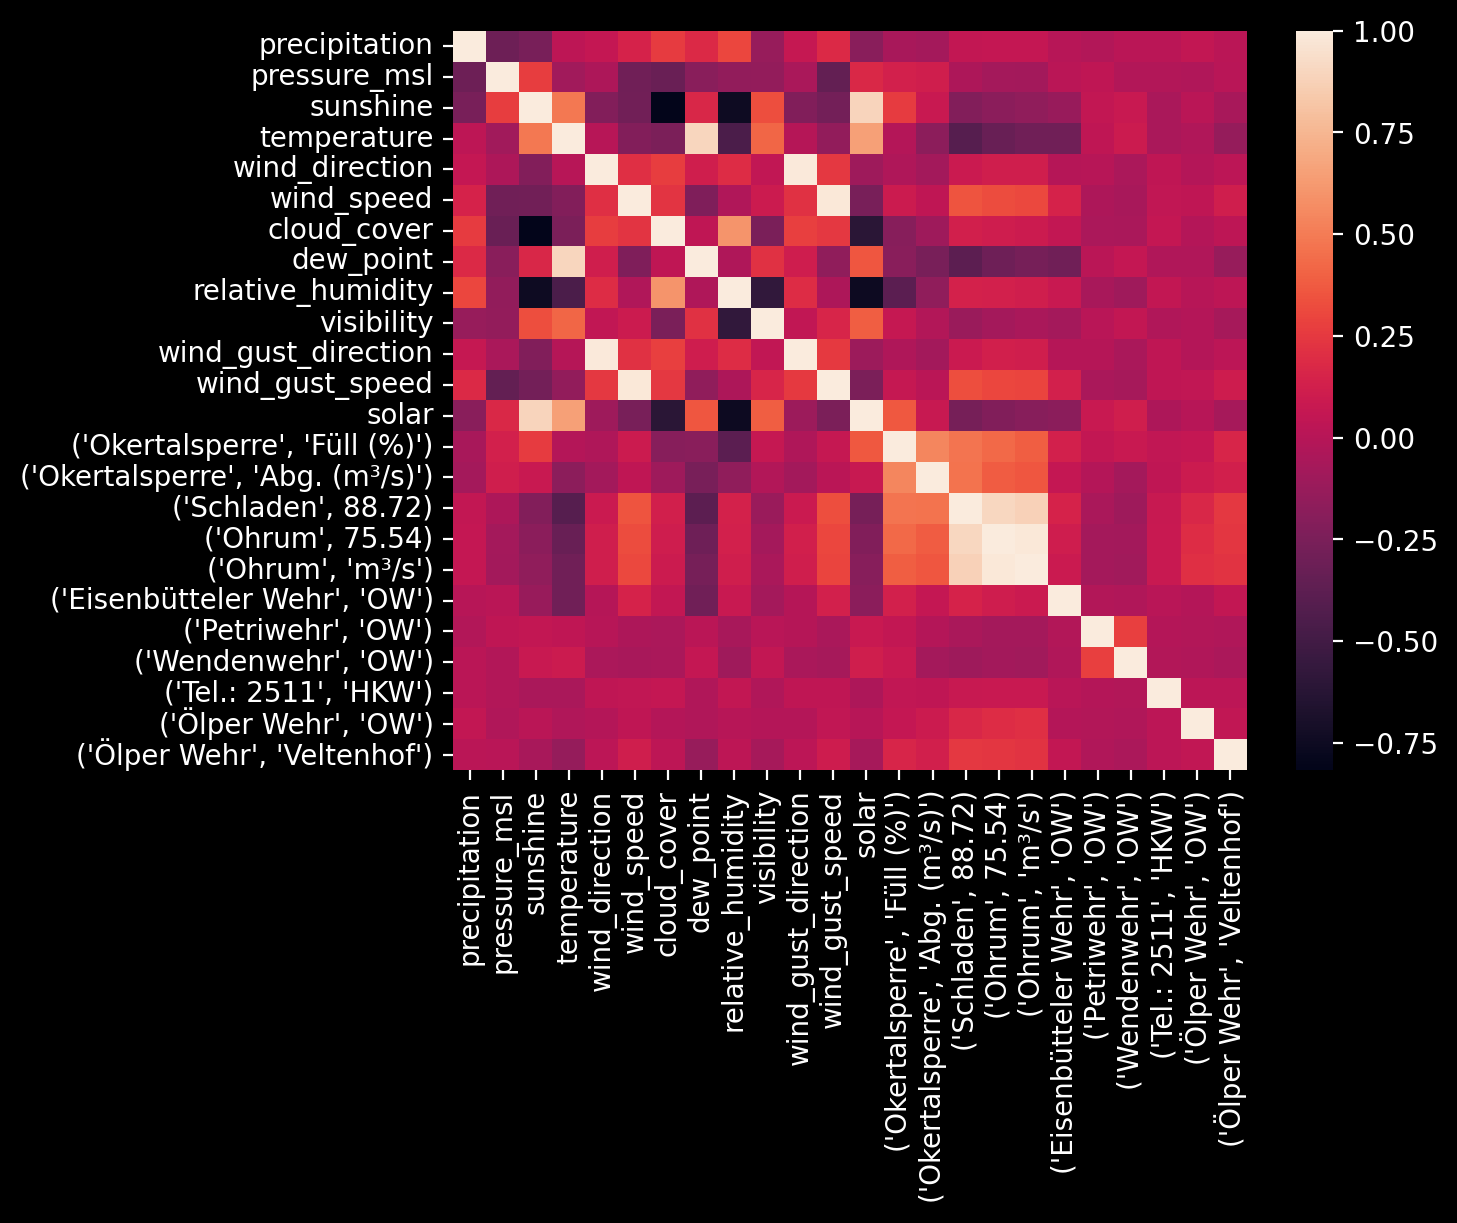

In [27]:
sns.heatmap(data_full.corr())

## Okertalsperre Füll (%)

In [28]:
Okertalsperre_1 = data_full.loc[
	:, weather_data.columns.to_list() + [("Okertalsperre", "Füll (%)")]
].corr()[[("Okertalsperre", "Füll (%)")]]
Okertalsperre_1 = Okertalsperre_1.iloc[:-1]
Okertalsperre_1 = Okertalsperre_1.rename(
	columns={("Okertalsperre", "Füll (%)"): "correlation"}
)
Okertalsperre_1.loc[:, "absolute_correlation"] = abs(Okertalsperre_1["correlation"])
Okertalsperre_1.sort_values(by="absolute_correlation", ascending=False)

,correlation,absolute_correlation
relative_humidity,-0.389049,0.389049
solar,0.362934,0.362934
sunshine,0.255875,0.255875
cloud_cover,-0.196600,0.196600
dew_point,-0.187158,0.187158
pressure_msl,0.131593,0.131593
wind_speed,0.096741,0.096741
visibility,0.067011,0.067011
wind_gust_speed,0.066009,0.066009
precipitation,-0.059653,0.059653


## Okertalsperre Abg. (m³/s)

In [29]:
Okertalsperre_2 = data_full.loc[
	:, weather_data.columns.to_list() + [("Okertalsperre", "Abg. (m³/s)")]
].corr()[[("Okertalsperre", "Abg. (m³/s)")]]
Okertalsperre_2 = Okertalsperre_2.iloc[:-1]
Okertalsperre_2 = Okertalsperre_2.rename(
	columns={("Okertalsperre", "Abg. (m³/s)"): "correlation"}
)
Okertalsperre_2.loc[:, "absolute_correlation"] = abs(Okertalsperre_2["correlation"])
Okertalsperre_2.sort_values(by="absolute_correlation", ascending=False)

,correlation,absolute_correlation
dew_point,-0.259819,0.259819
temperature,-0.171120,0.171120
relative_humidity,-0.159093,0.159093
pressure_msl,0.118880,0.118880
cloud_cover,-0.106814,0.106814
wind_gust_direction,-0.083504,0.083504
wind_direction,-0.083152,0.083152
sunshine,0.080146,0.080146
precipitation,-0.073749,0.073749
solar,0.070927,0.070927


## Eisenbüttler Wehr

In [37]:
eisenbuetteler = data_full.loc[
	:,
	weather_data.columns.to_list()
	+ [
		("Okertalsperre", "Füll (%)"),
		("Okertalsperre", "Abg. (m³/s)"),
		("Schladen", 88.72),
		("Ohrum", 75.54),
		("Ohrum", "m³/s"),
		("Eisenbütteler Wehr", "OW"),
	],
].corr()[[("Eisenbütteler Wehr", "OW")]]
eisenbuetteler = eisenbuetteler.iloc[:-1]
eisenbuetteler = eisenbuetteler.rename(
	columns={("Eisenbütteler Wehr", "OW"): "correlation"}
)
eisenbuetteler.loc[:, "absolute_correlation"] = abs(eisenbuetteler["correlation"])
eisenbuetteler.sort_values(by="absolute_correlation", ascending=False)

,correlation,absolute_correlation
temperature,-0.293289,0.293289
dew_point,-0.292680,0.292680
solar,-0.182779,0.182779
"(Schladen, 88.72)",0.148036,0.148036
wind_speed,0.145169,0.145169
wind_gust_speed,0.131213,0.131213
"(Okertalsperre, Füll (%))",0.128639,0.128639
sunshine,-0.125516,0.125516
"(Ohrum, 75.54)",0.112377,0.112377
"(Ohrum, m³/s)",0.084710,0.084710


## Petriwehr

In [39]:
petriwehr = data_full.loc[
	:,
	weather_data.columns.to_list()
	+ [
		("Okertalsperre", "Füll (%)"),
		("Okertalsperre", "Abg. (m³/s)"),
		("Schladen", 88.72),
		("Ohrum", 75.54),
		("Ohrum", "m³/s"),
		("Eisenbütteler Wehr", "OW"),
		("Petriwehr", "OW"),
	],
].corr()[[("Petriwehr", "OW")]]
petriwehr = petriwehr.iloc[:-1]
petriwehr = petriwehr.rename(columns={("Petriwehr", "OW"): "correlation"})
petriwehr.loc[:, "absolute_correlation"] = abs(petriwehr["correlation"])
petriwehr.sort_values(by="absolute_correlation", ascending=False)

,correlation,absolute_correlation
solar,0.081258,0.081258
"(Ohrum, m³/s)",-0.073623,0.073623
"(Ohrum, 75.54)",-0.073495,0.073495
relative_humidity,-0.062816,0.062816
sunshine,0.055402,0.055402
wind_gust_speed,-0.055210,0.055210
"(Schladen, 88.72)",-0.053817,0.053817
"(Okertalsperre, Füll (%))",0.050770,0.050770
cloud_cover,-0.049840,0.049840
temperature,0.041514,0.041514


## Wendenwehr

In [42]:
wendenwehr = data_full.loc[
	:,
	weather_data.columns.to_list()
	+ [
		("Okertalsperre", "Füll (%)"),
		("Okertalsperre", "Abg. (m³/s)"),
		("Schladen", 88.72),
		("Ohrum", 75.54),
		("Ohrum", "m³/s"),
		("Eisenbütteler Wehr", "OW"),
		("Wendenwehr", "OW"),
	],
].corr()[[("Wendenwehr", "OW")]]
wendenwehr = wendenwehr.iloc[:-1]
wendenwehr = wendenwehr.rename(columns={("Wendenwehr", "OW"): "correlation"})
wendenwehr.loc[:, "absolute_correlation"] = abs(wendenwehr["correlation"])
wendenwehr.sort_values(by="absolute_correlation", ascending=False)

,correlation,absolute_correlation
solar,0.116477,0.116477
"(Schladen, 88.72)",-0.105088,0.105088
relative_humidity,-0.098331,0.098331
temperature,0.097602,0.097602
"(Ohrum, m³/s)",-0.089573,0.089573
"(Ohrum, 75.54)",-0.083799,0.083799
sunshine,0.083141,0.083141
"(Okertalsperre, Füll (%))",0.077791,0.077791
"(Okertalsperre, Abg. (m³/s))",-0.077286,0.077286
wind_gust_speed,-0.067324,0.067324


## Tel(?)

In [33]:
tel = data_full.loc[:, weather_data.columns.to_list() + [("Tel.: 2511", "HKW")]].corr()[
	[("Tel.: 2511", "HKW")]
]
tel = tel.iloc[:-1]
tel = tel.rename(columns={("Tel.: 2511", "HKW"): "correlation"})
tel.loc[:, "absolute_correlation"] = abs(tel["correlation"])
tel.sort_values(by="absolute_correlation", ascending=False)

,correlation,absolute_correlation
cloud_cover,0.059647,0.059647
temperature,-0.054472,0.054472
relative_humidity,0.053272,0.053272
sunshine,-0.052158,0.052158
wind_speed,0.042467,0.042467
solar,-0.042405,0.042405
wind_gust_speed,0.041046,0.041046
wind_gust_direction,0.039264,0.039264
wind_direction,0.036380,0.036380
dew_point,-0.027882,0.027882


## Ölper Wehr OW

In [34]:
ölper1 = data_full.loc[
	:, weather_data.columns.to_list() + [("Ölper Wehr", "OW")]
].corr()[[("Ölper Wehr", "OW")]]
ölper1 = ölper1.iloc[:-1]
ölper1 = ölper1.rename(columns={("Ölper Wehr", "OW"): "correlation"})
ölper1.loc[:, "absolute_correlation"] = abs(ölper1["correlation"])
ölper1.sort_values(by="absolute_correlation", ascending=False)

,correlation,absolute_correlation
precipitation,0.049279,0.049279
wind_gust_speed,0.045169,0.045169
wind_speed,0.040990,0.040990
dew_point,-0.028323,0.028323
pressure_msl,-0.027041,0.027041
temperature,-0.026390,0.026390
sunshine,0.015591,0.015591
visibility,-0.011378,0.011378
wind_gust_direction,-0.010252,0.010252
wind_direction,-0.010209,0.010209


## Ölper Wehr Veltenhof

In [35]:
ölper2 = data_full.loc[
	:, weather_data.columns.to_list() + [("Ölper Wehr", "Veltenhof")]
].corr()[[("Ölper Wehr", "Veltenhof")]]
ölper2 = ölper2.iloc[:-1]
ölper2 = ölper2.rename(columns={("Ölper Wehr", "Veltenhof"): "correlation"})
ölper2.loc[:, "absolute_correlation"] = abs(ölper2["correlation"])
ölper2.sort_values(by="absolute_correlation", ascending=False)

,correlation,absolute_correlation
temperature,-0.136280,0.136280
dew_point,-0.135146,0.135146
wind_speed,0.115790,0.115790
wind_gust_speed,0.104535,0.104535
solar,-0.066633,0.066633
visibility,-0.065229,0.065229
sunshine,-0.058691,0.058691
relative_humidity,0.033245,0.033245
cloud_cover,0.031800,0.031800
wind_gust_direction,0.026757,0.026757
